In [173]:
import pandas as pd
import matplotlib.pyplot as plt

In [164]:
df=pd.read_csv("summary_data.csv")
df.head()

,flight_id,air_temperature,battery_serial_number,body_serial_number,commit,launch_airspeed,launch_groundspeed,launch_timestamp,preflight_voltage,rel_humidity,static_pressure,wind_direction,wind_magnitude,wing_serial_number
0,16951,20.550000,15SPJJJ09036021,577350132807348254,5c504d9a16,32.453445,30.164656,2018-09-06 07:43:59 CAT,NaN,74.150000,80662.081736,-49.434555,1.949338,15SPJJJ11024054
1,16952,20.500000,15SPJJJ10029029,577209618523054122,5c504d9a16,32.141209,30.535246,2018-09-06 07:51:49 CAT,NaN,71.175044,80708.065314,-4.408768,0.917357,15SPJJJ09011032
2,16954,24.475019,15SPJJJ10012034,577209618523054122,5c504d9a16,34.701878,29.872613,2018-09-06 09:56:37 CAT,NaN,66.374982,80774.270438,-23.458781,3.788383,15SPJJJ09011032
3,16955,27.300000,15SPJJJ10054027,577209618523082792,5c504d9a16,34.368999,29.877624,2018-09-06 10:27:04 CAT,NaN,59.000000,80805.138793,-46.747881,3.921605,15SPJJJ11049056
4,16957,26.950000,15SPJJJ10050049,577348835962150933,5c504d9a16,32.898979,30.027183,2018-09-06 11:09:39 CAT,NaN,63.900000,80768.969307,-29.293360,2.975881,15SPJJJ09031032


In [4]:
df.shape

(447, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 447 entries, 0 to 446
Data columns (total 14 columns):
flight_id                447 non-null int64
air_temperature          447 non-null float64
battery_serial_number    447 non-null object
body_serial_number       447 non-null int64
commit                   447 non-null object
launch_airspeed          447 non-null float64
launch_groundspeed       447 non-null float64
launch_timestamp         447 non-null object
preflight_voltage        431 non-null float64
rel_humidity             447 non-null float64
static_pressure          447 non-null float64
wind_direction           447 non-null float64
wind_magnitude           447 non-null float64
wing_serial_number       447 non-null object
dtypes: float64(8), int64(2), object(4)
memory usage: 49.0+ KB


In [99]:
desc=df.describe()
desc.drop(['flight_id', 'body_serial_number'], axis=1)

,air_temperature,launch_airspeed,launch_groundspeed,preflight_voltage,rel_humidity,static_pressure,wind_direction,wind_magnitude
count,447.000000,447.000000,447.000000,431.000000,447.000000,447.000000,447.000000,447.000000
mean,25.234679,31.976493,30.112178,32.145665,56.291622,80456.449107,-45.294524,2.359469
std,4.079718,1.759982,0.371296,0.187159,7.278221,170.113835,63.491695,0.996348
min,16.500000,28.027149,27.548899,31.544811,35.500000,80010.138720,-176.134898,0.188798
25%,22.037499,30.761058,29.926867,32.055271,51.200017,80323.793028,-78.527910,1.703303
50%,24.950000,31.893215,30.097641,32.189774,56.200000,80445.156986,-51.634721,2.307687
75%,28.325000,33.198513,30.282600,32.268639,61.350000,80590.144407,-25.951296,3.006968
max,34.600000,36.929199,31.205293,32.523598,74.150000,80844.071107,179.700111,7.466193


In [160]:
df1=df.groupby(df['launch_timestamp'].str[11:13].astype(float).fillna(0.0)).mean().reset_index()
df1

,launch_timestamp,flight_id,air_temperature,body_serial_number,launch_airspeed,launch_groundspeed,preflight_voltage,rel_humidity,static_pressure,wind_direction,wind_magnitude
0,7.0,17391.666667,21.727222,5.773310e+17,31.696805,30.112683,32.117165,63.606666,80625.286522,-39.216077,1.858159
1,8.0,17317.346154,23.603845,5.773499e+17,32.315669,30.056787,32.071808,62.484618,80648.148668,-40.186121,2.188647
2,9.0,17434.571429,25.196429,5.773399e+17,32.788811,30.001044,32.134916,59.983036,80669.249173,-41.473955,2.528057
3,10.0,17321.181818,26.803409,5.773306e+17,33.380456,29.964771,32.163845,56.835227,80654.663852,-38.954381,2.940090
4,11.0,17371.909091,27.976704,5.773370e+17,32.912582,29.935325,32.134547,55.321022,80575.726529,-57.784474,2.574044
5,12.0,17319.625000,27.380209,5.773381e+17,32.385191,30.032882,32.152526,57.577080,80509.415316,-41.952574,1.931447
6,13.0,17321.272727,30.375003,5.773306e+17,32.498428,29.938450,32.106533,51.628410,80373.612187,-49.872063,2.549551
7,14.0,17391.387097,29.749194,5.773406e+17,32.818959,29.921487,32.179510,50.269895,80309.545297,-46.124433,2.566488
8,15.0,17348.783784,27.834462,5.773384e+17,32.510852,30.084721,32.169157,53.159775,80294.731022,-57.122451,2.533677
9,16.0,17402.448980,24.615306,5.773355e+17,31.980627,30.149362,32.169776,54.198471,80313.433849,-35.767205,2.593021


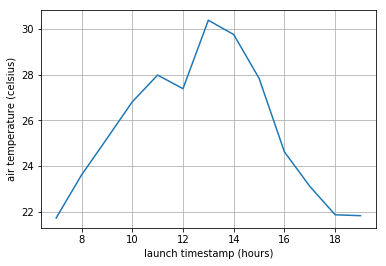

In [154]:
plt.plot(df1['launch_timestamp'], df1['air_temperature'])
plt.xlabel('launch timestamp (hours)')
plt.ylabel('air temperature (celsius)')
plt.grid()
plt.show()

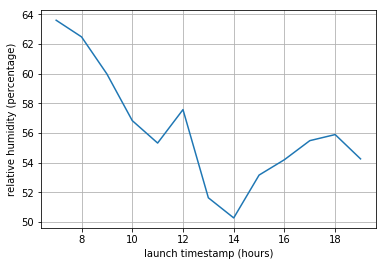

In [153]:
plt.plot(df1['launch_timestamp'], df1['rel_humidity'])
plt.xlabel('launch timestamp (hours)')
plt.ylabel('relative humidity (percentage)')
plt.grid()
plt.show()

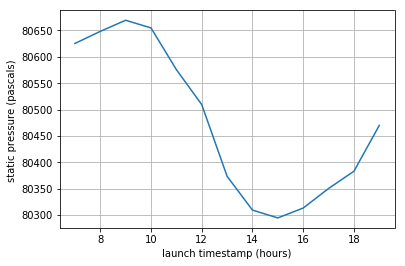

In [152]:
plt.plot(df1['launch_timestamp'], df1['static_pressure'])
plt.xlabel('launch timestamp (hours)')
plt.ylabel('static pressure (pascals) ')
plt.grid()
plt.show()

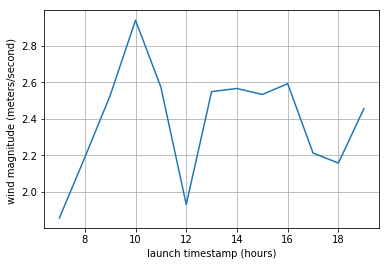

In [151]:
plt.plot(df1['launch_timestamp'], df1['wind_magnitude'])
plt.xlabel('launch timestamp (hours)')
plt.ylabel('wind magnitude (meters/second) ')
plt.grid()
plt.show()

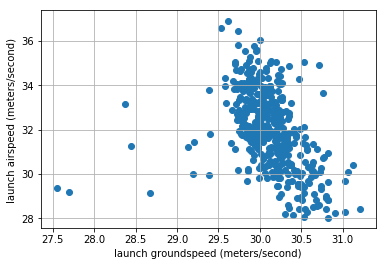

In [155]:
plt.scatter(df['launch_groundspeed'], df['launch_airspeed'])
plt.xlabel('launch groundspeed (meters/second)')
plt.ylabel('launch airspeed (meters/second) ')
plt.grid()
plt.show()

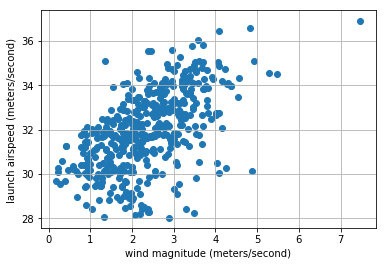

In [174]:
plt.scatter(df['wind_magnitude'], df['launch_airspeed'])
plt.xlabel('wind magnitude (meters/second)')
plt.ylabel('launch airspeed (meters/second) ')
plt.grid()
plt.show()

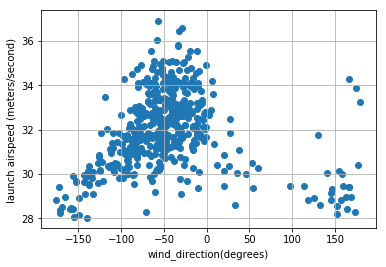

In [175]:
plt.scatter(df['wind_direction'], df['launch_airspeed'])
plt.xlabel('wind_direction(degrees)')
plt.ylabel('launch airspeed (meters/second) ')
plt.grid()
plt.show()

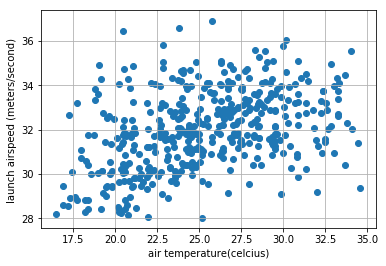

In [176]:
plt.scatter(df['air_temperature'], df['launch_airspeed'])
plt.xlabel('air temperature(celcius)')
plt.ylabel('launch airspeed (meters/second) ')
plt.grid()
plt.show()

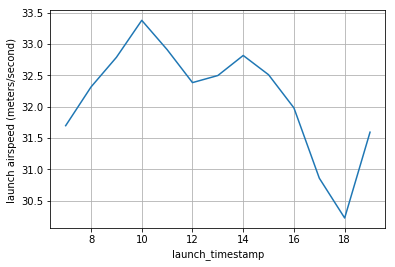

In [163]:
plt.plot(df1['launch_timestamp'], df1['launch_airspeed'])
plt.xlabel('launch_timestamp')
plt.ylabel('launch airspeed (meters/second) ')
plt.grid()
plt.show()

In [102]:
df.isnull().sum()

flight_id                 0
air_temperature           0
battery_serial_number     0
body_serial_number        0
commit                    0
launch_airspeed           0
launch_groundspeed        0
launch_timestamp          0
preflight_voltage        16
rel_humidity              0
static_pressure           0
wind_direction            0
wind_magnitude            0
wing_serial_number        0
dtype: int64

In [123]:
d=df.set_index('flight_id')
print(d[d.isnull().any(axis=1)]['preflight_voltage'])

flight_id
16951   NaN
16952   NaN
16954   NaN
16955   NaN
16957   NaN
16959   NaN
16960   NaN
16961   NaN
16962   NaN
16965   NaN
16967   NaN
16980   NaN
16983   NaN
16984   NaN
16986   NaN
16988   NaN
Name: preflight_voltage, dtype: float64


In [180]:
d1=d.drop(['body_serial_number'], axis=1)

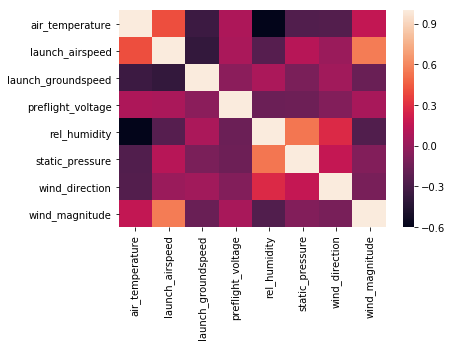

In [181]:
import seaborn as sns
corr = d1.corr()
plt=sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
plt

In [63]:
Q1 = df['launch_airspeed'].quantile(0.25)
Q3 = df['launch_airspeed'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

2.437455177307129


In [64]:
df_filtered = df[ (df['launch_airspeed'] < (Q1 - 1.5 * IQR)) | (df['launch_airspeed'] > (Q3 + 1.5 * IQR)) ]
df_filtered

,flight_id,air_temperature,battery_serial_number,body_serial_number,commit,launch_airspeed,launch_groundspeed,launch_timestamp,preflight_voltage,rel_humidity,static_pressure,wind_direction,wind_magnitude,wing_serial_number
106,17162,25.8,15SPJJJ09018015,577350132807348254,5c504d9a16,36.929199,29.610422,2018-09-12 16:58:38 CAT,32.191933,58.5,80252.837038,-56.521431,7.466193,15SPJJJ09052035


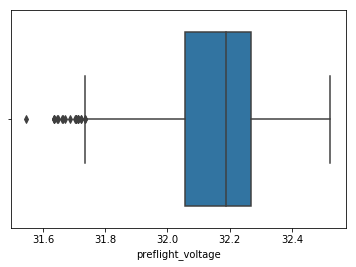

In [71]:
sns.boxplot(x=df['preflight_voltage'])

In [70]:
df['preflight_voltage'].mean()


32.14566492757775

In [74]:
Q1 = df['preflight_voltage'].quantile(0.2)
Q3 = df['preflight_voltage'].quantile(0.8)
IQR = Q3 - Q1
print(IQR)

0.27872467041016336


In [75]:
df_filtered = df[ (df['preflight_voltage'] < (Q1 - 1.5 * IQR)) | (df['preflight_voltage'] > (Q3 + 1.5 * IQR)) ]
df_filtered

,flight_id,air_temperature,battery_serial_number,body_serial_number,commit,launch_airspeed,launch_groundspeed,launch_timestamp,preflight_voltage,rel_humidity,static_pressure,wind_direction,wind_magnitude,wing_serial_number
422,17705,30.5,15SPJJJ10060032,577350132807348254,1ecbc27833,30.262875,30.608683,2018-10-04 13:18:43 CAT,31.544811,55.4,80402.47807,-101.071538,4.250868,15SPJJJ09019061
